# Rayleigh-Sommerfeld Propagation: multiprocessing

The module diffractio.scalar_sources_X, scalar_fields_X and scalar_masks_X for propagating a field generated by a scalar light source uses multiprocessing for two cases: polychromatic light and extent sources. 

## Introduction

Todo

##  Modules

In [1]:
%matplotlib inline

In [2]:
from diffractio import degrees, mm, plt, sp, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.scalar_fields_X import (
    Scalar_field_X, extended_source_multiprocessing,
    polychromatic_multiprocessing, extended_polychromatic_source)

from diffractio.utils_multiprocessing import execute_multiprocessing
from diffractio.utils_optics import (
    gauss_spectrum, lorentz_spectrum, uniform_spectrum)

## Multiprocessing: polychromatic light

In [3]:
# Definition of function, which only depends on wavelength, for multiprocessing

def __function_polychromatic__(wavelength):
    x0 = sp.linspace(-75 * um, 75 * um, 1024 * 8)

    t1 = Scalar_mask_X(x0, wavelength)
    t1.slit(x0=0, size=100 * um)

    f1 = Scalar_source_X(x0, wavelength)
    f1.gauss_beam(x0=0 * um, w0=200 * um, z0=0 * um, A=1, theta=0. * degrees)

    u1 = f1 * t1
    u1.RS(z=10 * um, new_field=False, verbose=False)

    return u1


num_proc: 4, time=0.9318051338195801
101


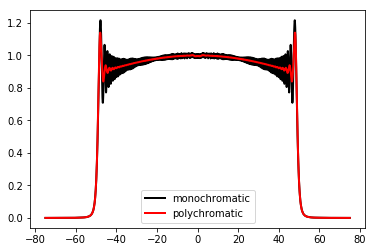

In [4]:
wavelengths = sp.linspace(.3 * um, .9 * um, 101)
w_central = wavelengths.mean()
spectrum_gauss = gauss_spectrum(wavelengths=wavelengths, w_central=w_central, Dw=0.4, normalize=True)

intensity, u_s, time_proc = polychromatic_multiprocessing(
        __function_polychromatic__,
        wavelengths,
        spectrum_gauss,
        num_processors=4,
        verbose=True)
intensity0, u_s0, time_proc0 = polychromatic_multiprocessing(
        __function_polychromatic__,
        w_central,
        1,
        num_processors=4,
        verbose=True)

plt.figure()
plt.plot(u_s0.x, intensity0, 'k', lw=2, label='monochromatic')
plt.plot(u_s[0].x, intensity, 'r', lw=2, label='polychromatic')
plt.legend()


## Multiprocessing: finite size source

In [5]:

def __experiment_extended_source__(x0):

    x = sp.linspace(-500 * um, 500 * um, 1024)
    wavelength = 0.850 * um
    z0 = -500 * mm
    period = 50 * um
    focal = 5 * mm

    red = Scalar_mask_X(x, wavelength)
    red.ronchi_grating(x0=0 * um, period=period, fill_factor=0.5)

    lens = Scalar_mask_X(x, wavelength)
    lens.lens(focal=focal, radius=30 * mm)

    u1 = Scalar_source_X(x, wavelength)

    # posiciones de la fuente

    u1.spherical_wave(
        A=1., x0=x0, z0=z0, radius=100000 * um, mask=False, normalize=True)
    u2 = u1 * red * lens
    u2.RS(z=focal, new_field=False, verbose=False)

    return u2



num_proc: 4, time=0.23422479629516602
101
num_proc: 1, time=0.011856317520141602


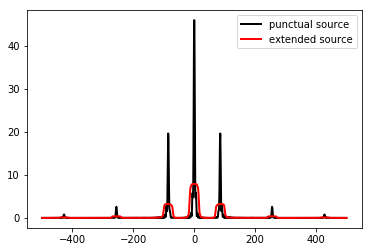

In [6]:
    """
    tomamos una red de difraccion y analizamos el efecto Lau con fuente extensa
    La fuente extensa la definimos como suma de fuentes puntuales esfericas
    Esquema: Fuente extensa, red, lens, vista en plano focal
    """
    # definiciones
    x0s = sp.linspace(-1500 * um, 1500 * um, 101)
    x0_central = 0 * um

    intensity, u_s, time_proc = extended_source_multiprocessing(
        __experiment_extended_source__, x0s, num_processors=4, verbose=True)
    intensity0, u_s0, time_proc0 = extended_source_multiprocessing(
        __experiment_extended_source__,
        x0_central,
        num_processors=1,
        verbose=True)

    plt.figure()
    plt.plot(u_s0.x, intensity0, 'k', lw=2, label='punctual source')
    plt.plot(u_s[0].x, intensity, 'r', lw=2, label='extended source')
    plt.legend()

